### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [2]:
parkinsons = pd.read_csv('Data - Parkinsons.csv')

### Look into the data to get an idea 

In [3]:
parkinsons.head().T

0               1               2  \
name              phon_R01_S01_1  phon_R01_S01_2  phon_R01_S01_3   
MDVP:Fo(Hz)              119.992           122.4         116.682   
MDVP:Fhi(Hz)             157.302          148.65         131.111   
MDVP:Flo(Hz)              74.997         113.819         111.555   
MDVP:Jitter(%)           0.00784         0.00968          0.0105   
MDVP:Jitter(Abs)           7e-05           8e-05           9e-05   
MDVP:RAP                  0.0037         0.00465         0.00544   
MDVP:PPQ                 0.00554         0.00696         0.00781   
Jitter:DDP               0.01109         0.01394         0.01633   
MDVP:Shimmer             0.04374         0.06134         0.05233   
MDVP:Shimmer(dB)           0.426           0.626           0.482   
Shimmer:APQ3             0.02182         0.03134         0.02757   
Shimmer:APQ5              0.0313         0.04518         0.03858   
MDVP:APQ                 0.02971         0.04368          0.0359   
Shimmer:DDA              0.06545         0.09403          0.0827   
NHR                      0.02211         0.01929         0.01309   
HNR                       21.033          19.085          20.651   
status                         1               1               1   
RPDE                    0.414783        0.458359        0.429895   
DFA                     0.815285        0.819521        0.825288   
spread1                 -4.81303        -4.07519        -4.44318   
spread2                 0.266482         0.33559        0.311173   
D2                       2.30144         2.48685         2.34226   
PPE                     0.284654        0.368674        0.332634   

                               3               4  
name              phon_R01_S01_4  phon_R01_S01_5  
MDVP:Fo(Hz)              116.676         116.014  
MDVP:Fhi(Hz)             137.871         141.781  
MDVP:Flo(Hz)             111.366         110.655  
MDVP:Jitter(%)           0.00997         0.01284  
MDVP:Jitter(Abs)           9e-05         0.00011  
MDVP:RAP                 0.00502         0.00655  
MDVP:PPQ                 0.00698         0.00908  
Jitter:DDP               0.01505         0.01966  
MDVP:Shimmer             0.05492         0.06425  
MDVP:Shimmer(dB)           0.517           0.584  
Shimmer:APQ3             0.02924          0.0349  
Shimmer:APQ5             0.04005         0.04825  
MDVP:APQ                 0.03772         0.04465  
Shimmer:DDA              0.08771          0.1047  
NHR                      0.01353         0.01767  
HNR                       20.644          19.649  
status                         1               1  
RPDE                    0.434969        0.417356  
DFA                     0.819235        0.823484  
spread1                  -4.1175        -3.74779  
spread2                 0.334147        0.234513  
D2                       2.40555         2.33218  
PPE                     0.368975        0.410335

### Shape of the data

In [4]:
parkinsons.shape

(195, 24)

##### There are 195 rows and 24 columns in the dataset

In [5]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

##### Except name column, all other columns are of type numeric

#### Since name column is not required for analysis, it can be dropped

In [6]:
parkinsons.drop('name' , axis = 1 , inplace = True)

### 5 point summary to get to know the spread of the data

In [7]:
parkinsons.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

There seems to be no such big outliers in the dataset

#### Check for missing values

In [8]:
parkinsons.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

##### There are no missing values in the dataset

#### Check for correlation

In [9]:
round(parkinsons.corr(),2)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)              1.00          0.40          0.60           -0.12   
MDVP:Fhi(Hz)             0.40          1.00          0.08            0.10   
MDVP:Flo(Hz)             0.60          0.08          1.00           -0.14   
MDVP:Jitter(%)          -0.12          0.10         -0.14            1.00   
MDVP:Jitter(Abs)        -0.38         -0.03         -0.28            0.94   
MDVP:RAP                -0.08          0.10         -0.10            0.99   
MDVP:PPQ                -0.11          0.09         -0.10            0.97   
Jitter:DDP              -0.08          0.10         -0.10            0.99   
MDVP:Shimmer            -0.10          0.00         -0.14            0.77   
MDVP:Shimmer(dB)        -0.07          0.04         -0.12            0.80   
Shimmer:APQ3            -0.09         -0.00         -0.15            0.75   
Shimmer:APQ5            -0.07         -0.01         -0.10            0.73   
MDVP:APQ                -0.08          0.00         -0.11            0.76   
Shimmer:DDA             -0.09         -0.00         -0.15            0.75   
NHR                     -0.02          0.16         -0.11            0.91   
HNR                      0.06         -0.02          0.21           -0.73   
status                  -0.38         -0.17         -0.38            0.28   
RPDE                    -0.38         -0.11         -0.40            0.36   
DFA                     -0.45         -0.34         -0.05            0.10   
spread1                 -0.41         -0.08         -0.39            0.69   
spread2                 -0.25         -0.00         -0.24            0.39   
D2                       0.18          0.18         -0.10            0.43   
PPE                     -0.37         -0.07         -0.34            0.72   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)                  -0.38     -0.08     -0.11       -0.08   
MDVP:Fhi(Hz)                 -0.03      0.10      0.09        0.10   
MDVP:Flo(Hz)                 -0.28     -0.10     -0.10       -0.10   
MDVP:Jitter(%)                0.94      0.99      0.97        0.99   
MDVP:Jitter(Abs)              1.00      0.92      0.90        0.92   
MDVP:RAP                      0.92      1.00      0.96        1.00   
MDVP:PPQ                      0.90      0.96      1.00        0.96   
Jitter:DDP                    0.92      1.00      0.96        1.00   
MDVP:Shimmer                  0.70      0.76      0.80        0.76   
MDVP:Shimmer(dB)              0.72      0.79      0.84        0.79   
Shimmer:APQ3                  0.70      0.74      0.76        0.74   
Shimmer:APQ5                  0.65      0.71      0.79        0.71   
MDVP:APQ                      0.65      0.74      0.80        0.74   
Shimmer:DDA                   0.70      0.74      0.76        0.74   
NHR                           0.83      0.92      0.84        0.92   
HNR                          -0.66     -0.72     -0.73       -0.72   
status                        0.34      0.27      0.29        0.27   
RPDE                          0.44      0.34      0.33        0.34   
DFA                           0.18      0.06      0.20        0.06   
spread1                       0.74      0.65      0.72        0.65   
spread2                       0.39      0.32      0.41        0.32   
D2                            0.31      0.43      0.41        0.43   
PPE                           0.75      0.67      0.77        0.67   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA   NHR  \
MDVP:Fo(Hz)              -0.10             -0.07  ...        -0.09 -0.02   
MDVP:Fhi(Hz)              0.00              0.04  ...        -0.00  0.16   
MDVP:Flo(Hz)             -0.14             -0.12  ...        -0.15 -0.11   
MDVP:Jitter(%)            0.77              0.80  ...         0.75  0.91   
MDVP:Jitter(Abs)          0.70              0.72  ...         0.70  0.83   
MDVP:RAP                  0.76  

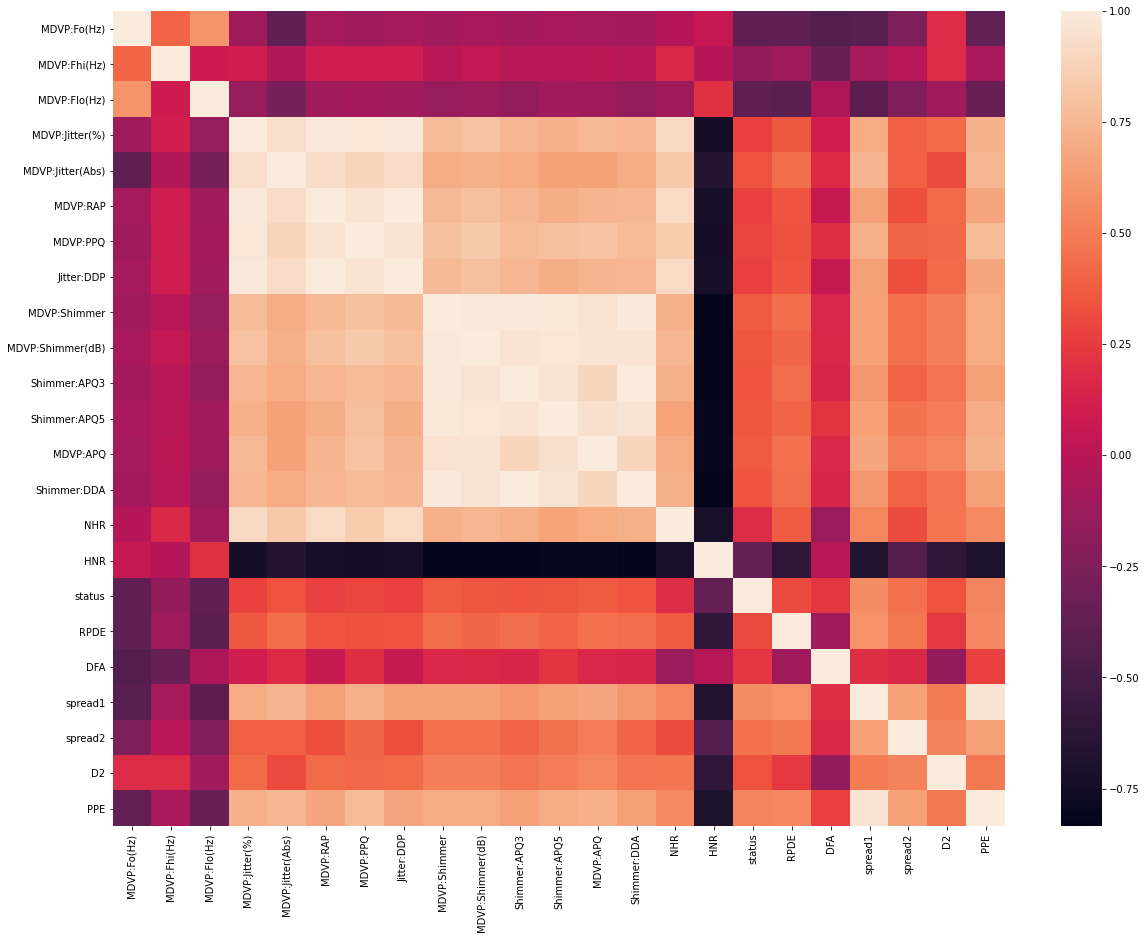

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(parkinsons.corr())

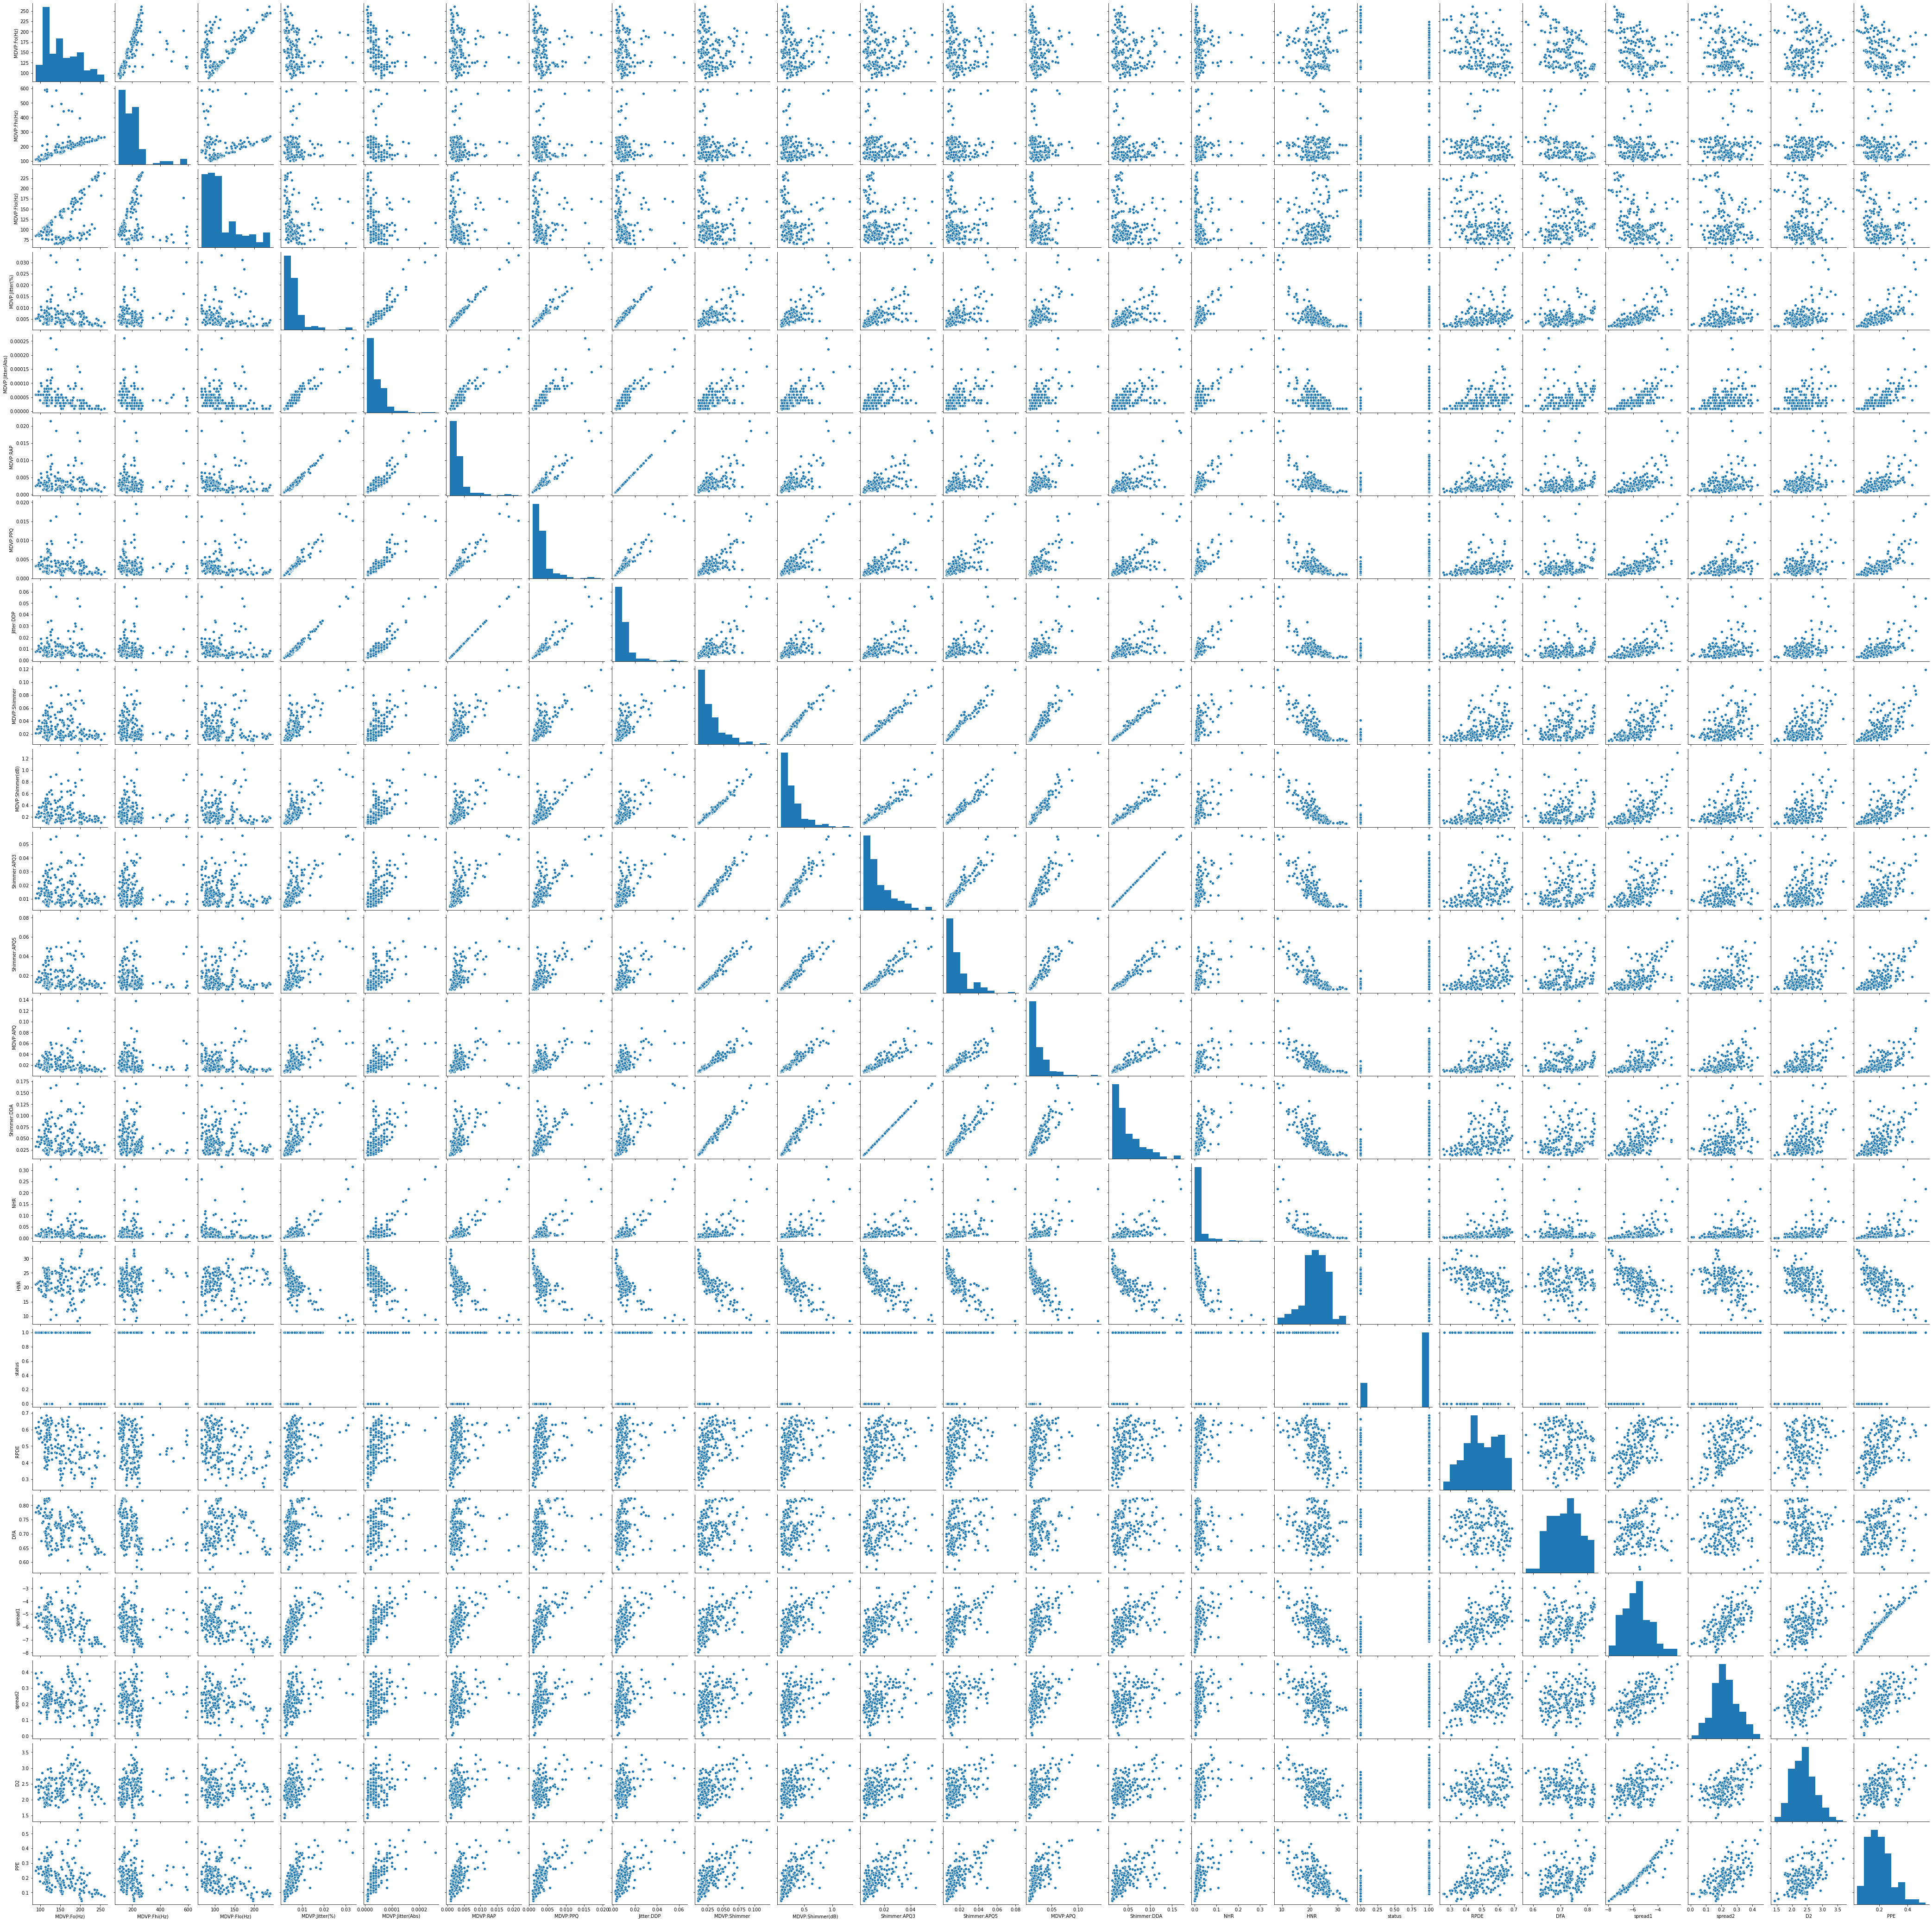

In [11]:
sns.pairplot(parkinsons)

all MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP are highly correlated (obvious)               
similarly, MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA are highly correlated (obvious)

In [12]:
parkinsons['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

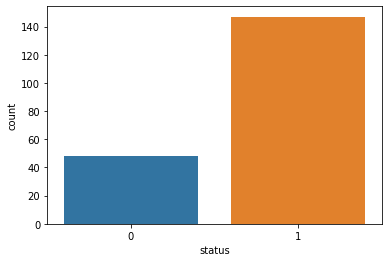

In [13]:
sns.countplot(parkinsons['status'])

Many people seem to have the disease from the data

#### Distribution of values in the columns

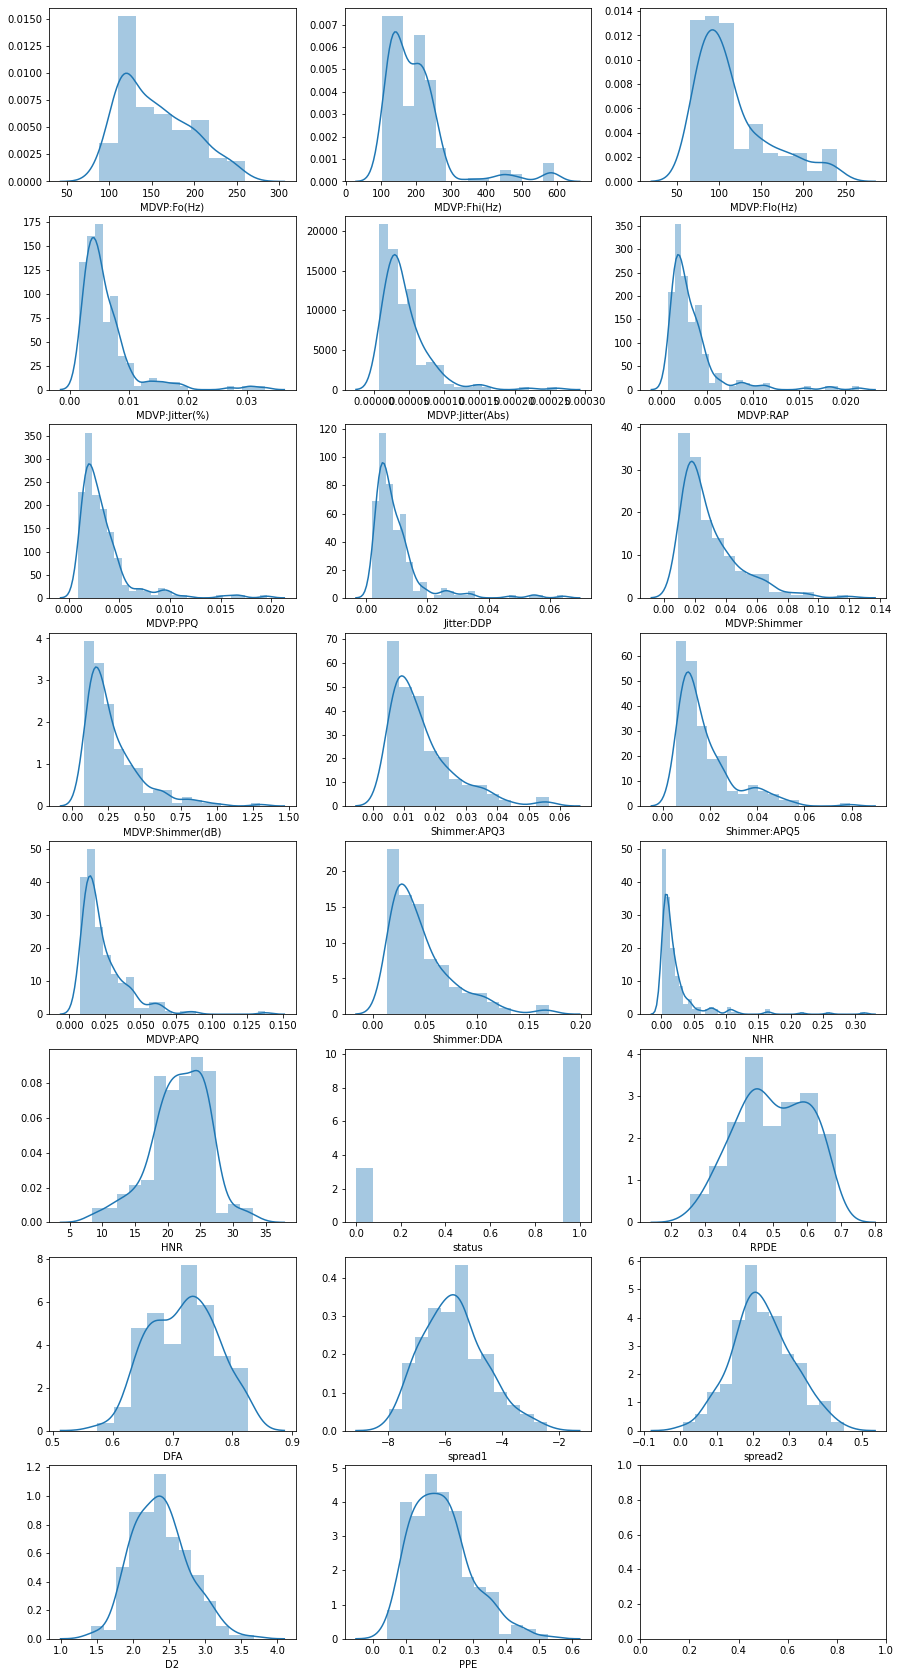

In [14]:
fig , a = plt.subplots(8,3, figsize = (15,30))
col = 0
for i in range(0,8):
    for j in range(0,3):
        if col < len(list(parkinsons.columns)):
#             sns.FacetGrid(parkinsons, hue = 'status', size = 5).map(sns.distplot, list(parkinsons.columns)[col]).add_legend()
            sns.distplot(parkinsons[list(parkinsons.columns)[col]] , ax=a[i][j])      
            col+=1

###### Most of the columns are right skewed except HMR, RPDE, DFA, spread1, spread2, D2, PPE

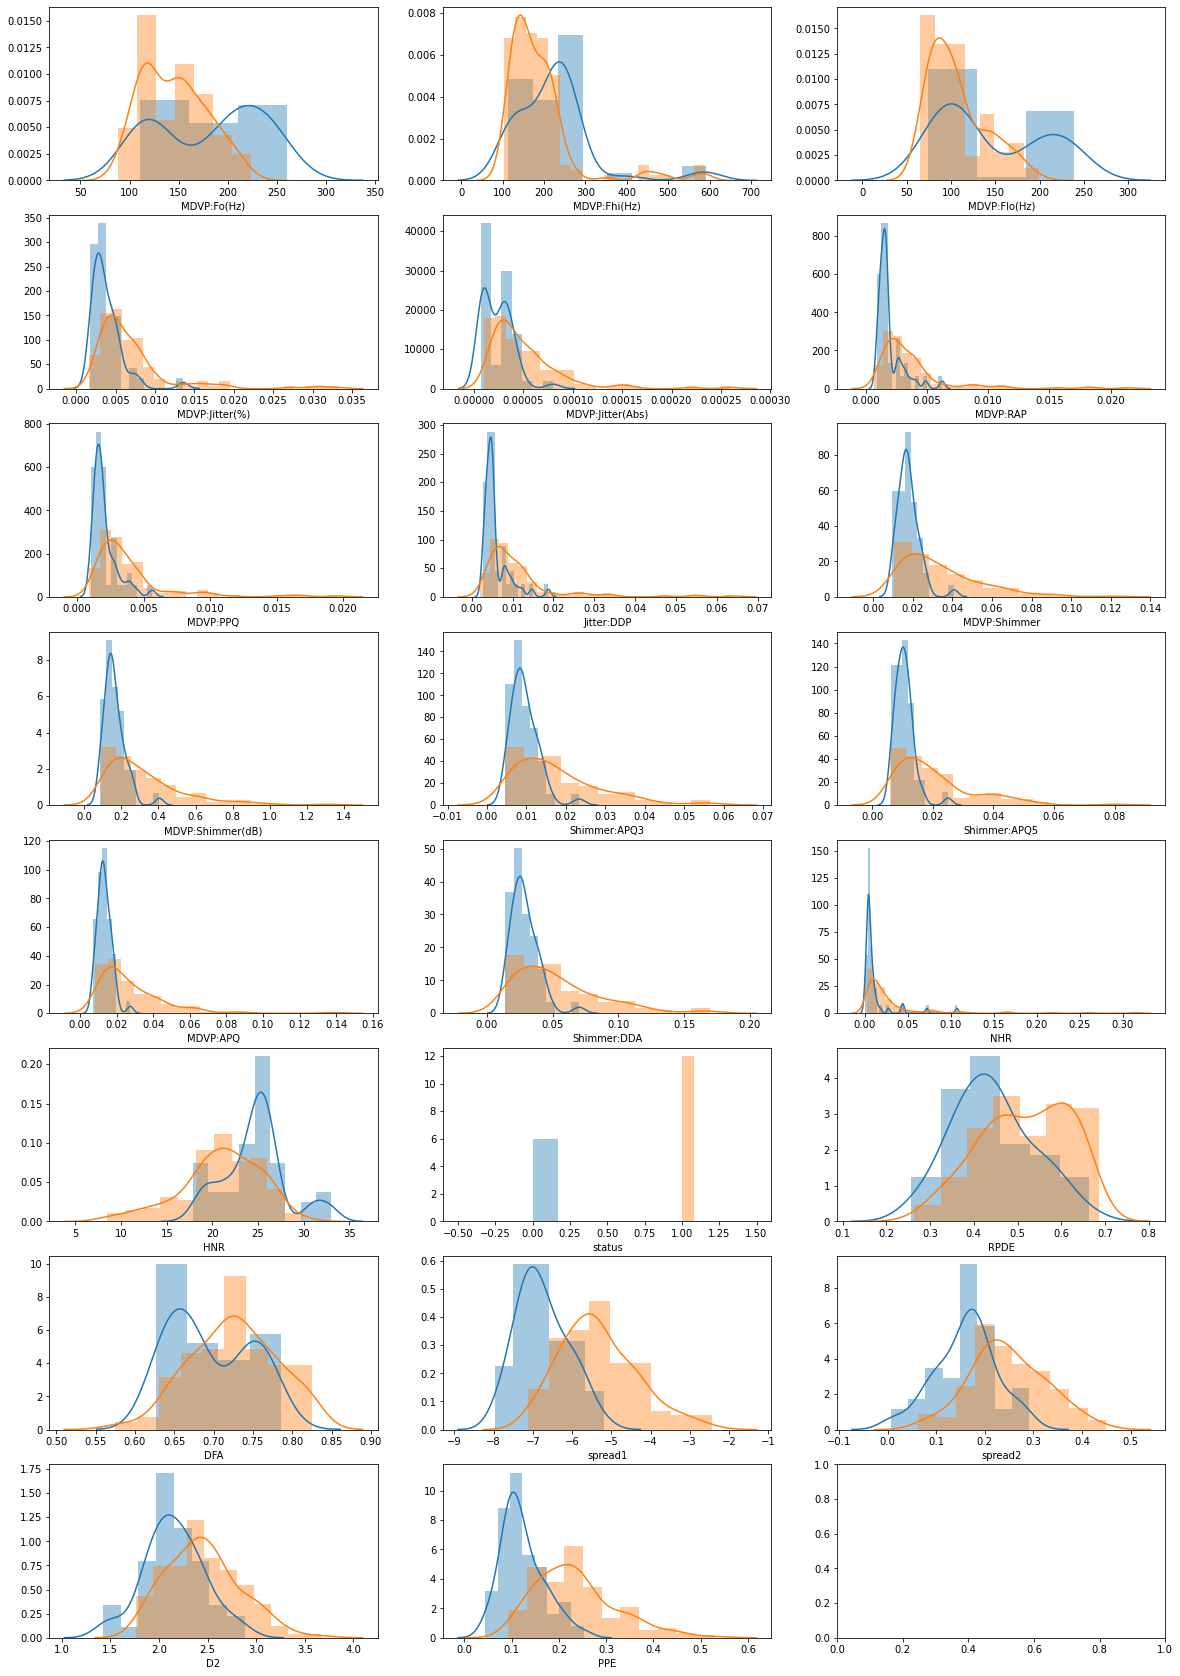

In [15]:
fig, ax = plt.subplots(8, 3, figsize = (20, 30))
col = 0
for i in range(0,8):
    for j in range(0,3):
        if col < len(list(parkinsons.columns)):

            a = sns.distplot(parkinsons.loc[parkinsons['status'] == 0, list(parkinsons.columns)[col]] ,ax=ax[i][j], label='No')  
            b = sns.distplot(parkinsons.loc[parkinsons['status'] == 1, list(parkinsons.columns)[col]] , ax=ax[i][j], label='Yes')  
            col+=1


##### There is a noticable difference in disease and non disease based on PPE. spread1, spread2

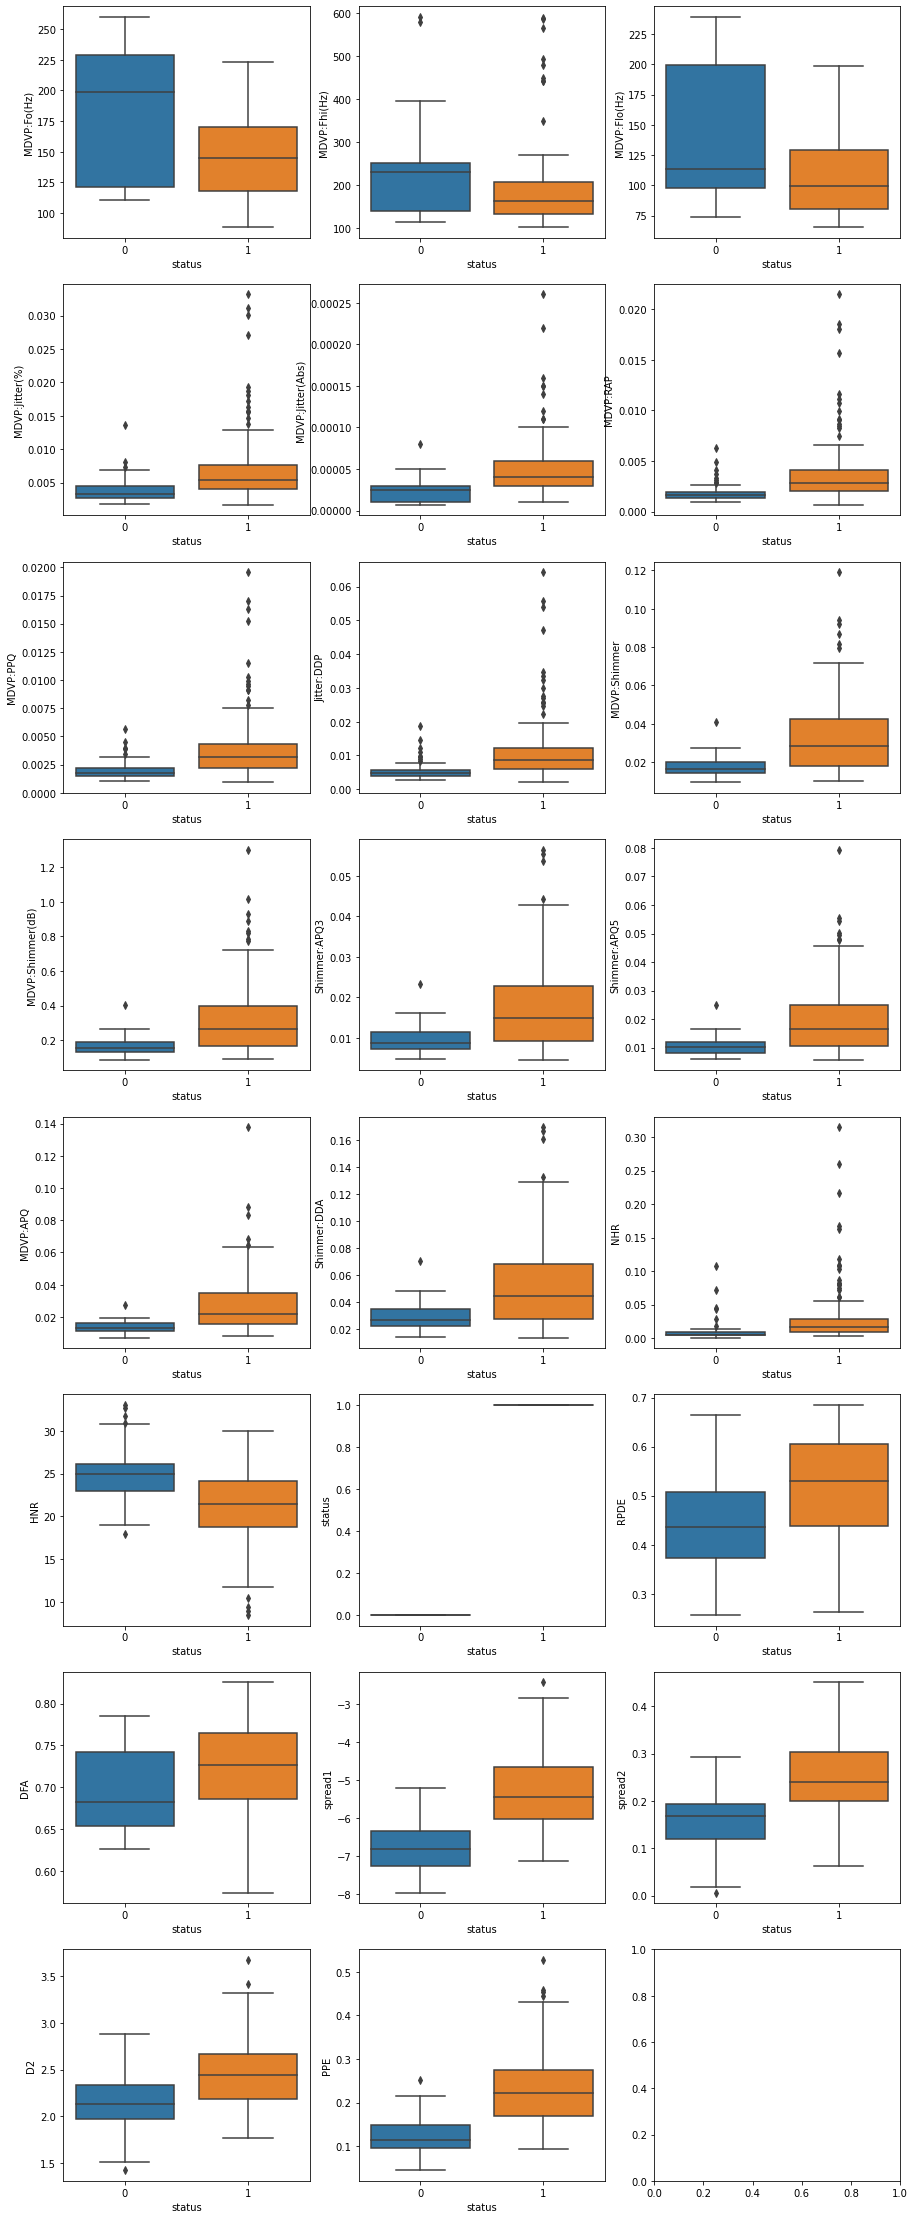

In [16]:
fig , a = plt.subplots(8,3, figsize = (15,40))
col = 0
for i in range(0,8):
    for j in range(0,3):
        if col < len(list(parkinsons.columns)):   
            sns.boxplot(parkinsons['status'] ,parkinsons[list(parkinsons.columns)[col]] , ax=a[i][j])
            col+=1

###### Except MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), HNR all other high values contribute more to parkinson's disease (status 1 has high values for other columns)

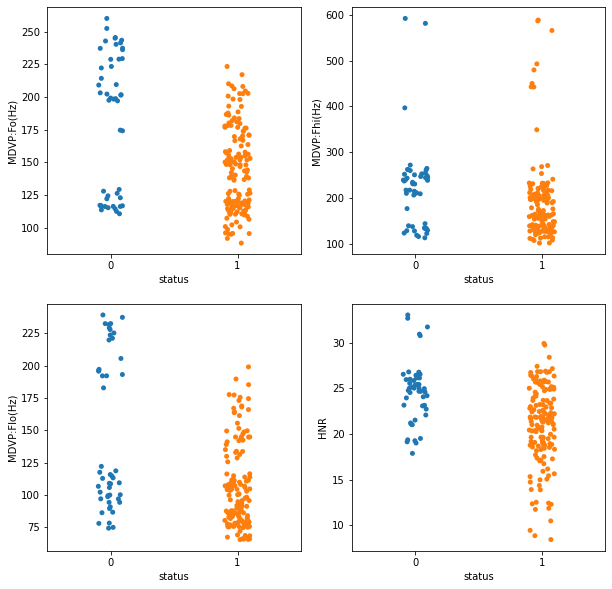

In [17]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
sns.stripplot(parkinsons['status'] , parkinsons['MDVP:Fo(Hz)'] , ax = ax[0][0])
sns.stripplot(parkinsons['status'] , parkinsons['MDVP:Fhi(Hz)'] , ax = ax[0][1])
sns.stripplot(parkinsons['status'] , parkinsons['MDVP:Flo(Hz)'] , ax = ax[1][0])
sns.stripplot(parkinsons['status'] , parkinsons['HNR'] , ax = ax[1][1])

It seems the same with strip plot also. MDVP:FHi(Hz) is almost similar for both status 1 and 0

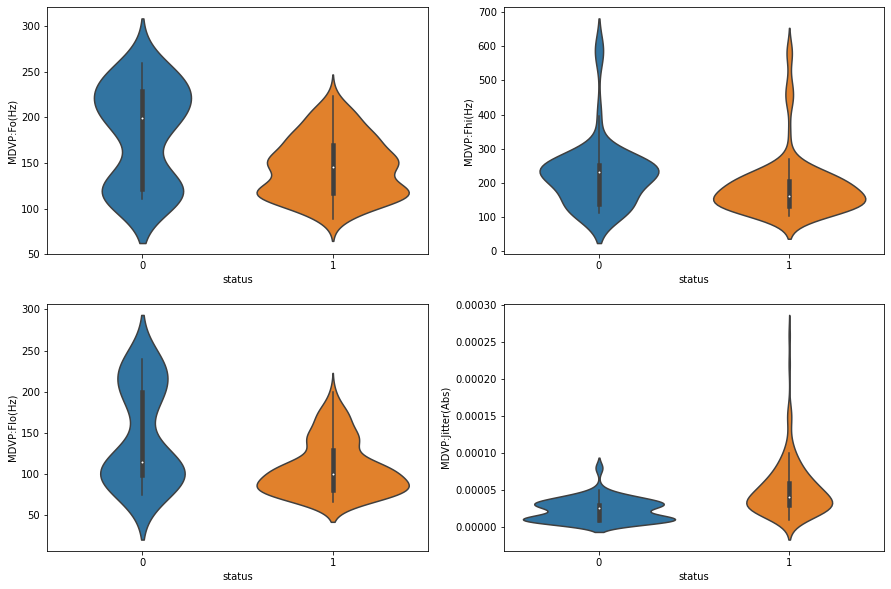

In [18]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.violinplot(x = parkinsons['status'], y= parkinsons['MDVP:Fo(Hz)'] ,  ax = ax[0][0])
sns.violinplot(x = parkinsons['status'], y= parkinsons['MDVP:Fhi(Hz)'],  ax = ax[0][1])
sns.violinplot(x = parkinsons['status'], y= parkinsons['MDVP:Flo(Hz)'],  ax = ax[1][0])
sns.violinplot(x = parkinsons['status'], y= parkinsons['MDVP:Jitter(Abs)'],  ax = ax[1][1])

Values in MDVP:Fo(Hz) lower range seems to have a disease and values in higher range is likely to not have a disease.           
similar trend is seen for MDVP:Flo(Hz).                   
MDVP:Fhi(Hz) does not seem to have any impact on the disease           
Lower values in MDVP:Jitter(Abs) are more likely to have disease (it should be similar for MDVP:RAP, MDVP:PPQ, Jitter:DDP)

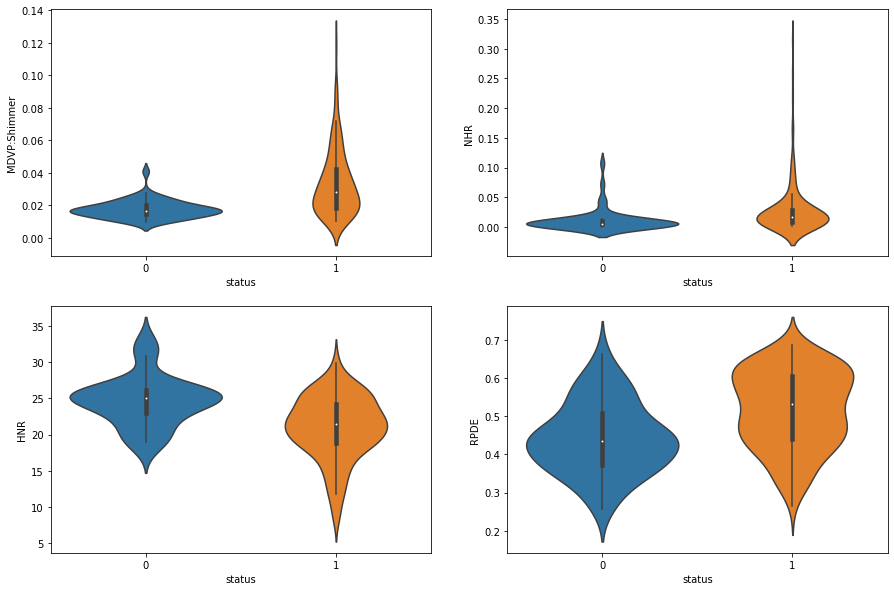

In [19]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.violinplot(x = parkinsons['status'], y= parkinsons['MDVP:Shimmer'] ,  ax = ax[0][0])
sns.violinplot(x = parkinsons['status'], y= parkinsons['NHR'],  ax = ax[0][1])
sns.violinplot(x = parkinsons['status'], y= parkinsons['HNR'],  ax = ax[1][0])
sns.violinplot(x = parkinsons['status'], y= parkinsons['RPDE'],  ax = ax[1][1])

Values in MDVP:Shimmer lower range seems to not have disease                    
similar trend is seen for NHR                           
higher values in HNR may be an indication of not disease         
RPDE seems to have less impact on disease

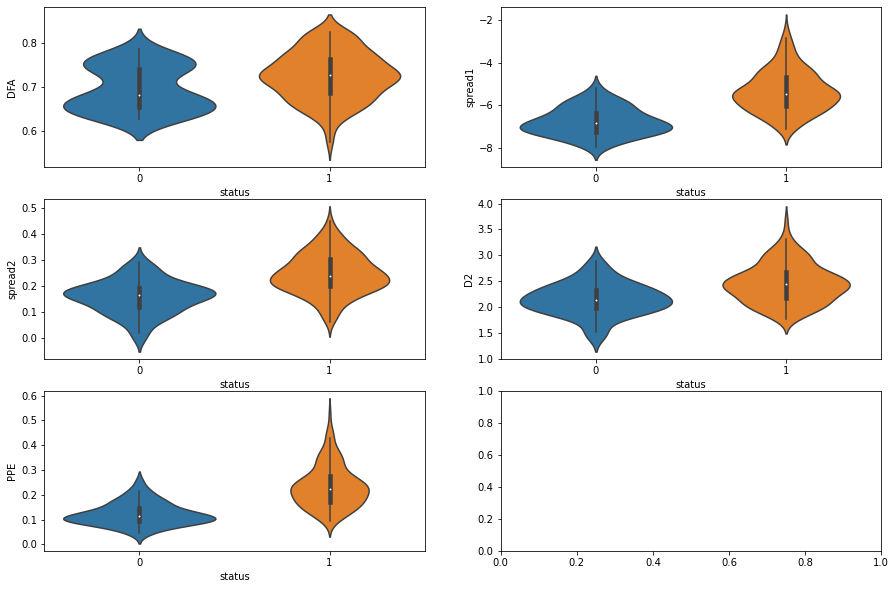

In [20]:
fig, ax = plt.subplots(3,2, figsize = (15,10))
sns.violinplot(x = parkinsons['status'], y= parkinsons['DFA'] ,  ax = ax[0][0])
sns.violinplot(x = parkinsons['status'], y= parkinsons['spread1'],  ax = ax[0][1])
sns.violinplot(x = parkinsons['status'], y= parkinsons['spread2'],  ax = ax[1][0])
sns.violinplot(x = parkinsons['status'], y= parkinsons['D2'],  ax = ax[1][1])
sns.violinplot(x = parkinsons['status'], y= parkinsons['PPE'],  ax = ax[2][0])

Higher values in spread1, spread2 and D2, PPE seems to influence in parkinson's disease           

## Split train and test data

In [21]:
x = parkinsons.drop(['status'] , axis = 1)
y = parkinsons['status']

In [22]:
x_reduce = parkinsons.drop(['status','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] , axis = 1)

In [23]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [24]:
x_train_reduce , x_test_reduce, y_train, y_test = train_test_split(x_reduce, y, test_size = 0.3, random_state = 1)

In [25]:
x_train_reduce.shape

(136, 13)

In [26]:
x_train.shape

(136, 22)

In [27]:
x_test_reduce.shape

(59, 13)

In [28]:
x_test.shape

(59, 22)

### There are 4 types of input which will be provided. All the columns, by removing the correlated columns, by feeding the scaled input with all columns and scaled input by removing correlated columns

##### Scaling the data

In [29]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

In [30]:
ss = StandardScaler()
x_train_reduce_scaled = ss.fit_transform(x_train_reduce)
x_test_reduce_scaled = ss.fit_transform(x_test_reduce)

## Logistic Regression

#### Normal data

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver = 'liblinear')
lr.fit(x_train, y_train)

y_predict_lr = lr.predict(x_test)

from sklearn import metrics
metrics.accuracy_score(y_predict_lr, y_test) * 100

81.35593220338984

In [32]:
lr_cm = metrics.confusion_matrix(y_predict_lr, y_test)
lr_cm

array([[10,  2],
       [ 9, 38]], dtype=int64)

#### Reduced data

In [33]:
lr_reduce = LogisticRegression( solver = 'liblinear')
lr_reduce.fit(x_train_reduce, y_train)

y_predict_lr_reduce = lr_reduce.predict(x_test_reduce)

metrics.accuracy_score(y_predict_lr_reduce, y_test) * 100

81.35593220338984

In [34]:
lr_cm_reduce = metrics.confusion_matrix(y_predict_lr_reduce, y_test)
lr_cm_reduce

array([[10,  2],
       [ 9, 38]], dtype=int64)

#### Normal scaled data

In [35]:
lr_scaled = LogisticRegression( solver = 'liblinear')
lr_scaled.fit(x_train_scaled, y_train)

y_predict_lr_scaled = lr_scaled.predict(x_test_scaled)

metrics.accuracy_score(y_predict_lr_scaled, y_test) * 100

86.4406779661017

In [36]:
lr_cm_scaled = metrics.confusion_matrix(y_predict_lr_scaled, y_test)
lr_cm_scaled

array([[11,  0],
       [ 8, 40]], dtype=int64)

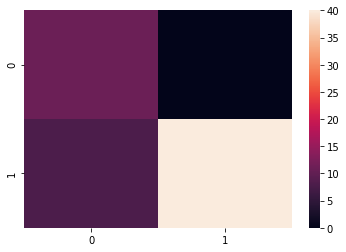

In [37]:
sns.heatmap(lr_cm_scaled)

In [38]:
print('Logistic regression with scaled data')
print('True positive count is',lr_cm_scaled[0][0])
print('False positive count is',lr_cm_scaled[0][1])
print('True negative count is',lr_cm_scaled[1][0])
print('False negative count is',lr_cm_scaled[1][1])
lr_accuracy = metrics.accuracy_score(y_predict_lr_scaled, y_test) * 100
print('Model Accuracy is',lr_accuracy)

Logistic regression with scaled data
True positive count is 11
False positive count is 0
True negative count is 8
False negative count is 40
Model Accuracy is 86.4406779661017


#### Reduced scaled data

In [39]:
lr_reduce_scaled = LogisticRegression( solver = 'liblinear')
lr_reduce_scaled.fit(x_train_reduce_scaled, y_train)

y_predict_lr_reduce_scaled = lr_reduce_scaled.predict(x_test_reduce_scaled)

metrics.accuracy_score(y_predict_lr_reduce_scaled, y_test) * 100

84.7457627118644

In [40]:
lr_cm_reduce_scaled = metrics.confusion_matrix(y_predict_lr_reduce_scaled, y_test)
lr_cm_reduce_scaled

array([[11,  1],
       [ 8, 39]], dtype=int64)

### In Logistic Regression, all the columns with scaled inputs gives better model accuracy (86.44%)

# Naive Bayes

#### Normal data

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

y_predict_nb = nb.predict(x_test)

metrics.accuracy_score(y_predict_nb, y_test)

0.711864406779661

In [42]:
cm_nb = metrics.confusion_matrix(y_predict_nb, y_test)
cm_nb

array([[18, 16],
       [ 1, 24]], dtype=int64)

#### Scaled data

In [43]:
nb_reduce = GaussianNB()
nb_reduce.fit(x_train_reduce, y_train)

y_predict_nb_reduce = nb_reduce.predict(x_test_reduce)

metrics.accuracy_score(y_predict_nb_reduce, y_test) * 100


77.96610169491525

In [44]:
cm_nb_reduce = metrics.confusion_matrix(y_predict_nb_reduce, y_test)
cm_nb_reduce

array([[16, 10],
       [ 3, 30]], dtype=int64)

#### Reduced data

In [45]:
nb_scaled = GaussianNB()
nb_scaled.fit(x_train_scaled, y_train)

y_predict_nb_scaled = nb_scaled.predict(x_test_scaled)

metrics.accuracy_score(y_predict_nb_scaled, y_test) * 100

66.10169491525424

In [46]:
cm_nb_scaled = metrics.confusion_matrix(y_predict_nb_scaled, y_test)
cm_nb_scaled

array([[13, 14],
       [ 6, 26]], dtype=int64)

#### Reduced scaled data

In [47]:
nb_reduce_scaled = LogisticRegression( solver = 'liblinear')
nb_reduce_scaled.fit(x_train_reduce_scaled, y_train)

y_predict_nb_reduce_scaled = nb_reduce_scaled.predict(x_test_reduce_scaled)

metrics.accuracy_score(y_predict_nb_reduce_scaled, y_test) * 100

84.7457627118644

In [48]:
cm_nb_reduce_scaled = metrics.confusion_matrix(y_predict_nb_reduce_scaled, y_test)
cm_nb_reduce_scaled

array([[11,  1],
       [ 8, 39]], dtype=int64)

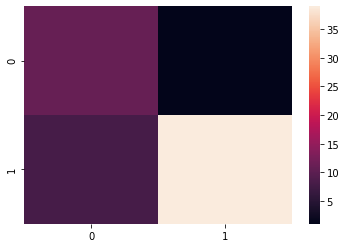

In [49]:
sns.heatmap(cm_nb_reduce_scaled)

In [50]:
print('Naive Bayes with reduced and scaled data')
print('True positive count is',cm_nb_reduce_scaled[0][0])
print('False positive count is',cm_nb_reduce_scaled[0][1])
print('True negative count is',cm_nb_reduce_scaled[1][0])
print('False negative count is',cm_nb_reduce_scaled[1][1])
nb_accuracy = metrics.accuracy_score(y_predict_nb_reduce_scaled, y_test) * 100
print('Model Accuracy is',nb_accuracy)

Naive Bayes with reduced and scaled data
True positive count is 11
False positive count is 1
True negative count is 8
False negative count is 39
Model Accuracy is 84.7457627118644


## KNN

#### Normal data

In [51]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    knn.fit(x_train, y_train)

    y_predict_knn = knn.predict(x_test)

    print('k =', i ,metrics.accuracy_score(y_predict_knn, y_test))

k = 3 0.8305084745762712
k = 4 0.8135593220338984
k = 5 0.8135593220338984
k = 6 0.8305084745762712
k = 7 0.7966101694915254
k = 8 0.8305084745762712
k = 9 0.8135593220338984
k = 10 0.8305084745762712
k = 11 0.7966101694915254
k = 12 0.7966101694915254
k = 13 0.7796610169491526
k = 14 0.7796610169491526
k = 15 0.8135593220338984
k = 16 0.7966101694915254
k = 17 0.8135593220338984
k = 18 0.8135593220338984
k = 19 0.8135593220338984


### K value 3 gives better accuracy

In [52]:
knn = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
knn.fit(x_train, y_train)

y_predict_knn = knn.predict(x_test)

metrics.accuracy_score(y_predict_knn, y_test) * 100

83.05084745762711

In [53]:
cm_knn = metrics.confusion_matrix(y_predict_knn, y_test)
cm_knn

array([[11,  2],
       [ 8, 38]], dtype=int64)

#### Reduced data

In [54]:
for i in range(3,20):
    knn_reduce = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn_reduce.fit(x_train_reduce, y_train)

    y_predict_knn_reduce = knn_reduce.predict(x_test_reduce)

    print('k =', i, metrics.accuracy_score(y_predict_knn_reduce, y_test) * 100)

k = 3 83.05084745762711
k = 4 81.35593220338984
k = 5 81.35593220338984
k = 6 83.05084745762711
k = 7 79.66101694915254
k = 8 83.05084745762711
k = 9 81.35593220338984
k = 10 83.05084745762711
k = 11 79.66101694915254
k = 12 79.66101694915254
k = 13 77.96610169491525
k = 14 77.96610169491525
k = 15 81.35593220338984
k = 16 79.66101694915254
k = 17 81.35593220338984
k = 18 81.35593220338984
k = 19 81.35593220338984


### K value 3 gives better accuracy

In [55]:
knn_reduce = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_reduce.fit(x_train_reduce, y_train)

y_predict_knn_reduce = knn_reduce.predict(x_test_reduce)

print(metrics.accuracy_score(y_predict_knn_reduce, y_test) * 100)

83.05084745762711


In [56]:
cm_knn_reduce = metrics.confusion_matrix(y_predict_knn_reduce, y_test)
cm_knn_reduce

array([[11,  2],
       [ 8, 38]], dtype=int64)

#### scaled data

In [57]:
for i in range(3,20):
    knn_scaled = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn_scaled.fit(x_train_scaled, y_train)

    y_predict_knn_scaled = knn_scaled.predict(x_test_scaled)

    print('k =', i , metrics.accuracy_score(y_predict_knn_scaled, y_test) * 100)

k = 3 88.13559322033898
k = 4 88.13559322033898
k = 5 81.35593220338984
k = 6 83.05084745762711
k = 7 81.35593220338984
k = 8 81.35593220338984
k = 9 77.96610169491525
k = 10 79.66101694915254
k = 11 79.66101694915254
k = 12 77.96610169491525
k = 13 77.96610169491525
k = 14 76.27118644067797
k = 15 76.27118644067797
k = 16 76.27118644067797
k = 17 76.27118644067797
k = 18 76.27118644067797
k = 19 76.27118644067797


### K value 3 gives better accuracy

In [58]:
knn_scaled = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_scaled.fit(x_train_scaled, y_train)

y_predict_knn_scaled = knn_scaled.predict(x_test_scaled)

print(metrics.accuracy_score(y_predict_knn_scaled, y_test) * 100)

88.13559322033898


In [59]:
cm_knn_scaled = metrics.confusion_matrix(y_predict_knn_scaled, y_test)
cm_knn_scaled

array([[13,  1],
       [ 6, 39]], dtype=int64)

#### Reduced Scaled data

In [60]:
for i in range(3,20):
    knn_reduce_scaled = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn_reduce_scaled.fit(x_train_reduce_scaled, y_train)

    y_predict_knn_reduce_scaled = knn_reduce_scaled.predict(x_test_reduce_scaled)

    print('k =', i , metrics.accuracy_score(y_predict_knn_reduce_scaled, y_test) * 100)

k = 3 88.13559322033898
k = 4 89.83050847457628
k = 5 84.7457627118644
k = 6 84.7457627118644
k = 7 84.7457627118644
k = 8 84.7457627118644
k = 9 79.66101694915254
k = 10 81.35593220338984
k = 11 77.96610169491525
k = 12 77.96610169491525
k = 13 77.96610169491525
k = 14 77.96610169491525
k = 15 77.96610169491525
k = 16 77.96610169491525
k = 17 76.27118644067797
k = 18 76.27118644067797
k = 19 76.27118644067797


### K value 4 gives better accuracy

In [61]:
knn_reduce_scaled = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn_reduce_scaled.fit(x_train_reduce_scaled, y_train)

y_predict_knn_reduce_scaled = knn_reduce_scaled.predict(x_test_reduce_scaled)

print(metrics.accuracy_score(y_predict_knn_reduce_scaled, y_test) * 100)

89.83050847457628


In [62]:
cm_knn_reduce_scaled = metrics.confusion_matrix(y_predict_knn_reduce_scaled, y_test)
cm_knn_reduce_scaled

array([[14,  1],
       [ 5, 39]], dtype=int64)

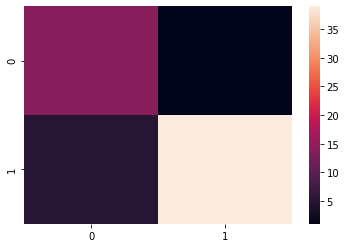

In [63]:
sns.heatmap(cm_knn_reduce_scaled)

In [64]:
print('KNN with reduced and scaled data')
print('True positive count is',cm_knn_reduce_scaled[0][0])
print('False positive count is',cm_knn_reduce_scaled[0][1])
print('True negative count is',cm_knn_reduce_scaled[1][0])
print('False negative count is',cm_knn_reduce_scaled[1][1])
knn_accuracy = metrics.accuracy_score(y_predict_knn_reduce_scaled, y_test) * 100
print('Model Accuracy is', knn_accuracy)

KNN with reduced and scaled data
True positive count is 14
False positive count is 1
True negative count is 5
False negative count is 39
Model Accuracy is 89.83050847457628


# SVM

#### Normal data

In [65]:
from sklearn import svm

for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        clf = svm.SVC(gamma = 0.001, C = 100)
        clf.fit(x_train, y_train)

        y_predict_svm = clf.predict(x_test)
#         print(g,C)
#         print(metrics.accuracy_score(y_predict_svm, y_test))

#### For gamma = 0.001 and C = 100, the accuracy score seems to be better

In [66]:
clf = svm.SVC(gamma = 0.001, C = 100)
clf.fit(x_train, y_train)

y_predict_svm = clf.predict(x_test)
metrics.accuracy_score(y_predict_svm, y_test) * 100

83.05084745762711

In [67]:
svm_cm = metrics.confusion_matrix(y_predict_svm , y_test)
svm_cm

array([[12,  3],
       [ 7, 37]], dtype=int64)

#### Reduced data

In [68]:
for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm_reduce = svm.SVC(gamma = g, C = C)
        svm_reduce.fit(x_train_reduce, y_train)

        y_predict_svm_reduce = svm_reduce.predict(x_test_reduce)
        print(g,C)
        print(metrics.accuracy_score(y_predict_svm_reduce, y_test) * 100)

0.001 0.001
67.79661016949152
0.001 0.01
67.79661016949152
0.001 0.1
67.79661016949152
0.001 1
74.57627118644068
0.001 10
79.66101694915254
0.001 100
83.05084745762711
0.01 0.001
67.79661016949152
0.01 0.01
67.79661016949152
0.01 0.1
67.79661016949152
0.01 1
76.27118644067797
0.01 10
77.96610169491525
0.01 100
77.96610169491525
0.1 0.001
67.79661016949152
0.1 0.01
67.79661016949152
0.1 0.1
67.79661016949152
0.1 1
69.49152542372882
0.1 10
71.1864406779661
0.1 100
71.1864406779661
1 0.001
67.79661016949152
1 0.01
67.79661016949152
1 0.1
67.79661016949152
1 1
67.79661016949152
1 10
67.79661016949152
1 100
67.79661016949152
10 0.001
67.79661016949152
10 0.01
67.79661016949152
10 0.1
67.79661016949152
10 1
67.79661016949152
10 10
67.79661016949152
10 100
67.79661016949152
100 0.001
67.79661016949152
100 0.01
67.79661016949152
100 0.1
67.79661016949152
100 1
67.79661016949152
100 10
67.79661016949152
100 100
67.79661016949152


#### Accuracy is better for gamma = 0.001 and C = 100

In [69]:
svm_reduce = svm.SVC(gamma = 0.001, C = 100)
svm_reduce.fit(x_train_reduce, y_train)

y_predict_svm_reduce = svm_reduce.predict(x_test_reduce)
print(metrics.accuracy_score(y_predict_svm_reduce, y_test) * 100)

83.05084745762711


In [70]:
svm_cm_reduce = metrics.confusion_matrix(y_predict_svm_reduce, y_test)
svm_cm_reduce

array([[12,  3],
       [ 7, 37]], dtype=int64)

#### scaled data

In [71]:
for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm_scaled = svm.SVC(gamma = g, C = C)
        svm_scaled.fit(x_train_scaled, y_train)
        
        y_predict_svm_scaled = svm_scaled.predict(x_test_scaled)
        print(g, C)
        print(metrics.accuracy_score(y_predict_svm_scaled, y_test) * 100)

0.001 0.001
67.79661016949152
0.001 0.01
67.79661016949152
0.001 0.1
67.79661016949152
0.001 1
67.79661016949152
0.001 10
79.66101694915254
0.001 100
83.05084745762711
0.01 0.001
67.79661016949152
0.01 0.01
67.79661016949152
0.01 0.1
67.79661016949152
0.01 1
79.66101694915254
0.01 10
81.35593220338984
0.01 100
83.05084745762711
0.1 0.001
67.79661016949152
0.1 0.01
67.79661016949152
0.1 0.1
67.79661016949152
0.1 1
77.96610169491525
0.1 10
83.05084745762711
0.1 100
89.83050847457628
1 0.001
67.79661016949152
1 0.01
67.79661016949152
1 0.1
67.79661016949152
1 1
71.1864406779661
1 10
72.88135593220339
1 100
72.88135593220339
10 0.001
67.79661016949152
10 0.01
67.79661016949152
10 0.1
67.79661016949152
10 1
67.79661016949152
10 10
67.79661016949152
10 100
67.79661016949152
100 0.001
67.79661016949152
100 0.01
67.79661016949152
100 0.1
67.79661016949152
100 1
67.79661016949152
100 10
67.79661016949152
100 100
67.79661016949152


### For gamma 0.001 and C 100, the accuracy is better

In [72]:
svm_scaled = svm.SVC(gamma = 0.001, C = 100)
svm_scaled.fit(x_train_scaled, y_train)

y_predict_svm_scaled = svm_scaled.predict(x_test_scaled)

print(metrics.accuracy_score(y_predict_svm_scaled, y_test) * 100)

83.05084745762711


In [73]:
svm_cm_scaled = metrics.confusion_matrix(y_predict_svm_scaled, y_test)
svm_cm_scaled

array([[ 9,  0],
       [10, 40]], dtype=int64)

### Reduced scaled data

In [74]:
for g in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm_reduce_scaled = svm.SVC(gamma = g, C = C)
        svm_reduce_scaled.fit(x_train_reduce_scaled, y_train)

        y_predict_svm_reduce_scaled = svm_reduce_scaled.predict(x_test_reduce_scaled)
        print(g,C)
        print(metrics.accuracy_score(y_predict_svm_reduce_scaled, y_test) * 100)

0.001 0.001
67.79661016949152
0.001 0.01
67.79661016949152
0.001 0.1
67.79661016949152
0.001 1
67.79661016949152
0.001 10
79.66101694915254
0.001 100
84.7457627118644
0.01 0.001
67.79661016949152
0.01 0.01
67.79661016949152
0.01 0.1
67.79661016949152
0.01 1
79.66101694915254
0.01 10
81.35593220338984
0.01 100
79.66101694915254
0.1 0.001
67.79661016949152
0.1 0.01
67.79661016949152
0.1 0.1
67.79661016949152
0.1 1
77.96610169491525
0.1 10
88.13559322033898
0.1 100
88.13559322033898
1 0.001
67.79661016949152
1 0.01
67.79661016949152
1 0.1
67.79661016949152
1 1
72.88135593220339
1 10
74.57627118644068
1 100
74.57627118644068
10 0.001
67.79661016949152
10 0.01
67.79661016949152
10 0.1
67.79661016949152
10 1
67.79661016949152
10 10
67.79661016949152
10 100
67.79661016949152
100 0.001
67.79661016949152
100 0.01
67.79661016949152
100 0.1
67.79661016949152
100 1
67.79661016949152
100 10
67.79661016949152
100 100
67.79661016949152


### For gamma 0.001 and C 100, the accuracy is better

In [75]:
svm_reduce_scaled = svm.SVC(gamma = 0.001, C = 100)
svm_reduce_scaled.fit(x_train_reduce_scaled, y_train)

y_predict_svm_reduce_scaled = svm_reduce_scaled.predict(x_test_reduce_scaled)
print(g,C)
print(metrics.accuracy_score(y_predict_svm_reduce_scaled, y_test) * 100)

100 100
84.7457627118644


In [76]:
svm_cm_reduce_scaled = metrics.confusion_matrix(y_predict_svm_reduce_scaled, y_test)
svm_cm_reduce_scaled

array([[10,  0],
       [ 9, 40]], dtype=int64)

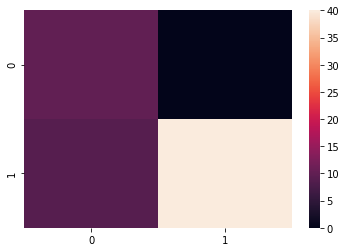

In [77]:
sns.heatmap(svm_cm_reduce_scaled)

In [78]:
print('SVM with reduced and scaled data')
print('True positive count is',svm_cm_reduce_scaled[0][0])
print('False positive count is',svm_cm_reduce_scaled[0][1])
print('True negative count is',svm_cm_reduce_scaled[1][0])
print('False negative count is',svm_cm_reduce_scaled[1][1])
svm_accuracy = metrics.accuracy_score(y_predict_svm_reduce_scaled, y_test) * 100
print('Model Accuracy is', svm_accuracy)

SVM with reduced and scaled data
True positive count is 10
False positive count is 0
True negative count is 9
False negative count is 40
Model Accuracy is 84.7457627118644


## Decision tree classifier

### Normal Data

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dt.fit(x_train, y_train)

y_predict_dt = dt.predict(x_test)

print(metrics.accuracy_score(y_predict_dt, y_test) * 100)

77.96610169491525


In [80]:
dt_cm = metrics.confusion_matrix(y_predict_dt, y_test)
dt_cm

array([[10,  4],
       [ 9, 36]], dtype=int64)

### Reduced Data

In [81]:
dt_reduce = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dt_reduce.fit(x_train_reduce, y_train)

y_predict_dt_reduce = dt_reduce.predict(x_test_reduce)

print(metrics.accuracy_score(y_predict_dt_reduce, y_test) * 100)

81.35593220338984


In [82]:
dt_cm_reduce = metrics.confusion_matrix(y_predict_dt_reduce, y_test)
dt_cm_reduce

array([[12,  4],
       [ 7, 36]], dtype=int64)

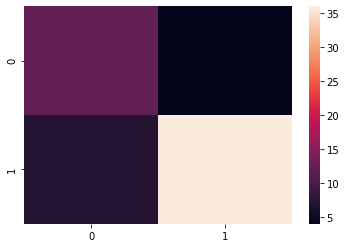

In [83]:
sns.heatmap(dt_cm_reduce)

### Scaled Data

In [84]:
dt_scaled = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dt_scaled.fit(x_train_scaled, y_train)

y_predict_dt_scaled = dt_scaled.predict(x_test_scaled)

print(metrics.accuracy_score(y_predict_dt_scaled, y_test) * 100)

76.27118644067797


In [85]:
dt_cm_scaled = metrics.confusion_matrix(y_predict_dt_scaled, y_test)
dt_cm_scaled

array([[ 8,  3],
       [11, 37]], dtype=int64)

### Reduced Scaled Data

In [86]:
dt_reduce_scaled = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dt_reduce_scaled.fit(x_train_reduce_scaled, y_train)

y_predict_dt_reduce_scaled = dt_reduce_scaled.predict(x_test_reduce_scaled)

print(metrics.accuracy_score(y_predict_dt_reduce_scaled, y_test) * 100)

72.88135593220339


In [87]:
dt_cm_reduce_scaled = metrics.confusion_matrix(y_predict_dt_reduce_scaled, y_test)
dt_cm_reduce_scaled

array([[ 7,  4],
       [12, 36]], dtype=int64)

In [88]:
print('Decision Tree with reduced data')
print('True positive count is',dt_cm_reduce[0][0])
print('False positive count is',dt_cm_reduce[0][1])
print('True negative count is',dt_cm_reduce[1][0])
print('False negative count is',dt_cm_reduce[1][1])
dt_accuracy = metrics.accuracy_score(y_predict_dt_reduce, y_test) * 100
print('Model Accuracy is', dt_accuracy)

Decision Tree with reduced data
True positive count is 12
False positive count is 4
True negative count is 7
False negative count is 36
Model Accuracy is 81.35593220338984


In [89]:
pd.DataFrame(dt_reduce.feature_importances_ , columns = ['Imp'], index = x_train_reduce.columns)

Imp
MDVP:Fo(Hz)     0.022250
MDVP:Fhi(Hz)    0.122313
MDVP:Flo(Hz)    0.000000
MDVP:Jitter(%)  0.000000
MDVP:Shimmer    0.000000
NHR             0.000000
HNR             0.139001
RPDE            0.000000
DFA             0.000000
spread1         0.000000
spread2         0.131155
D2              0.048813
PPE             0.536468

### Accuracy is better for reduced data. Also there are 7 other columns which do not contribute to the predictions

# Random Forest

### Normal Data

In [90]:
from sklearn.ensemble import RandomForestClassifier

for i in range(2,50):
    for j in range(1,15):
        rfc = RandomForestClassifier(n_estimators = i, max_features = j, random_state = 1)
        rfc.fit(x_train, y_train)

        y_predict_rfc = rfc.predict(x_test)
        print(i, j)
        print(metrics.accuracy_score(y_predict_rfc, y_test))

2 1
0.6440677966101694
2 2
0.7457627118644068
2 3
0.711864406779661
2 4
0.7288135593220338
2 5
0.7288135593220338
2 6
0.7966101694915254
2 7
0.6779661016949152
2 8
0.7627118644067796
2 9
0.7288135593220338
2 10
0.711864406779661
2 11
0.7627118644067796
2 12
0.7796610169491526
2 13
0.711864406779661
2 14
0.7457627118644068
3 1
0.7796610169491526
3 2
0.8135593220338984
3 3
0.8135593220338984
3 4
0.7457627118644068
3 5
0.7627118644067796
3 6
0.7627118644067796
3 7
0.7796610169491526
3 8
0.7796610169491526
3 9
0.6779661016949152
3 10
0.7796610169491526
3 11
0.7966101694915254
3 12
0.864406779661017
3 13
0.864406779661017
3 14
0.8305084745762712
4 1
0.7796610169491526
4 2
0.8305084745762712
4 3
0.864406779661017
4 4
0.8305084745762712
4 5
0.847457627118644
4 6
0.7796610169491526
4 7
0.7288135593220338
4 8
0.7796610169491526
4 9
0.7796610169491526
4 10
0.7627118644067796
4 11
0.7966101694915254
4 12
0.864406779661017
4 13
0.847457627118644
4 14
0.864406779661017
5 1
0.7457627118644068
5 2
0.

27 5
0.864406779661017
27 6
0.7966101694915254
27 7
0.847457627118644
27 8
0.8305084745762712
27 9
0.8813559322033898
27 10
0.8813559322033898
27 11
0.864406779661017
27 12
0.8813559322033898
27 13
0.864406779661017
27 14
0.8305084745762712
28 1
0.864406779661017
28 2
0.847457627118644
28 3
0.864406779661017
28 4
0.847457627118644
28 5
0.8983050847457628
28 6
0.8305084745762712
28 7
0.847457627118644
28 8
0.847457627118644
28 9
0.8983050847457628
28 10
0.864406779661017
28 11
0.864406779661017
28 12
0.8983050847457628
28 13
0.864406779661017
28 14
0.847457627118644
29 1
0.847457627118644
29 2
0.847457627118644
29 3
0.864406779661017
29 4
0.847457627118644
29 5
0.864406779661017
29 6
0.8135593220338984
29 7
0.847457627118644
29 8
0.864406779661017
29 9
0.8983050847457628
29 10
0.8813559322033898
29 11
0.864406779661017
29 12
0.8813559322033898
29 13
0.864406779661017
29 14
0.864406779661017
30 1
0.847457627118644
30 2
0.847457627118644
30 3
0.864406779661017
30 4
0.847457627118644
30 5


### For n_estimators = 5 and max_features = 12, the accuracy is better

In [91]:
rfc = RandomForestClassifier(n_estimators = 5, max_features = 12, random_state = 1)
rfc.fit(x_train, y_train)

y_predict_rfc = rfc.predict(x_test)

print(metrics.accuracy_score(y_predict_rfc, y_test))

0.9152542372881356


In [92]:
rfc_cm = metrics.confusion_matrix(y_predict_rfc, y_test)
rfc_cm

array([[15,  1],
       [ 4, 39]], dtype=int64)

### Reduced Data

In [93]:
for i in range(2,50):
    for j in range(1,13):
        rfc_reduce = RandomForestClassifier(n_estimators = i, max_features = j, random_state = 2)
        rfc_reduce.fit(x_train_reduce, y_train)

        y_predict_rfc_reduce = rfc_reduce.predict(x_test_reduce)
        print(i, j)
        print(metrics.accuracy_score(y_predict_rfc_reduce, y_test))

2 1
0.8135593220338984
2 2
0.7457627118644068
2 3
0.7627118644067796
2 4
0.7966101694915254
2 5
0.8983050847457628
2 6
0.8983050847457628
2 7
0.7796610169491526
2 8
0.7288135593220338
2 9
0.7966101694915254
2 10
0.847457627118644
2 11
0.8305084745762712
2 12
0.7457627118644068
3 1
0.847457627118644
3 2
0.8305084745762712
3 3
0.7966101694915254
3 4
0.847457627118644
3 5
0.8983050847457628
3 6
0.8983050847457628
3 7
0.8305084745762712
3 8
0.8305084745762712
3 9
0.8135593220338984
3 10
0.847457627118644
3 11
0.8305084745762712
3 12
0.8305084745762712
4 1
0.8813559322033898
4 2
0.847457627118644
4 3
0.8305084745762712
4 4
0.864406779661017
4 5
0.9152542372881356
4 6
0.8983050847457628
4 7
0.8813559322033898
4 8
0.8305084745762712
4 9
0.847457627118644
4 10
0.847457627118644
4 11
0.847457627118644
4 12
0.8305084745762712
5 1
0.864406779661017
5 2
0.8305084745762712
5 3
0.864406779661017
5 4
0.864406779661017
5 5
0.9152542372881356
5 6
0.8983050847457628
5 7
0.9322033898305084
5 8
0.83050847

31 4
0.9152542372881356
31 5
0.8983050847457628
31 6
0.864406779661017
31 7
0.8813559322033898
31 8
0.847457627118644
31 9
0.847457627118644
31 10
0.8813559322033898
31 11
0.847457627118644
31 12
0.847457627118644
32 1
0.847457627118644
32 2
0.8813559322033898
32 3
0.9322033898305084
32 4
0.9152542372881356
32 5
0.9152542372881356
32 6
0.8813559322033898
32 7
0.8983050847457628
32 8
0.847457627118644
32 9
0.847457627118644
32 10
0.8813559322033898
32 11
0.847457627118644
32 12
0.8305084745762712
33 1
0.8305084745762712
33 2
0.864406779661017
33 3
0.9152542372881356
33 4
0.8983050847457628
33 5
0.9322033898305084
33 6
0.847457627118644
33 7
0.8983050847457628
33 8
0.847457627118644
33 9
0.847457627118644
33 10
0.8813559322033898
33 11
0.847457627118644
33 12
0.8305084745762712
34 1
0.8135593220338984
34 2
0.8813559322033898
34 3
0.9322033898305084
34 4
0.8813559322033898
34 5
0.9152542372881356
34 6
0.864406779661017
34 7
0.8983050847457628
34 8
0.847457627118644
34 9
0.847457627118644


In [94]:
rfc_reduce = RandomForestClassifier(n_estimators = 5, max_features = 7, random_state = 2)
rfc_reduce.fit(x_train_reduce, y_train)

y_predict_rfc_reduce = rfc_reduce.predict(x_test_reduce)
print(i, j)
print(metrics.accuracy_score(y_predict_rfc_reduce, y_test))

49 12
0.9322033898305084


In [95]:
rfc_cm_reduce = metrics.confusion_matrix(y_predict_rfc_reduce, y_test)
rfc_cm_reduce

array([[17,  2],
       [ 2, 38]], dtype=int64)

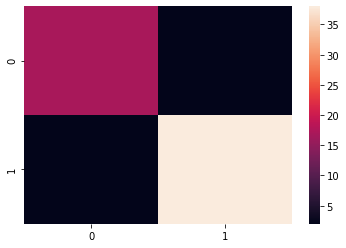

In [96]:
sns.heatmap(rfc_cm_reduce)

### Scaled Data

In [97]:
l = []
value1 = []
value2 = []
for i in range(2,50):
    for j in range(1,15):
        rfc_scaled = RandomForestClassifier(n_estimators = i, max_features = j, random_state = 2)
        rfc_scaled.fit(x_train_scaled, y_train)

        y_predict_rfc_scaled = rfc_scaled.predict(x_test_scaled)
        print(i, j)
        print(metrics.accuracy_score(y_predict_rfc_scaled, y_test))
        value1.append(i)
        value2.append(j)
        l.append(metrics.accuracy_score(y_predict_rfc_scaled, y_test))

2 1
0.711864406779661
2 2
0.7288135593220338
2 3
0.8135593220338984
2 4
0.7288135593220338
2 5
0.7796610169491526
2 6
0.8135593220338984
2 7
0.8135593220338984
2 8
0.7796610169491526
2 9
0.7796610169491526
2 10
0.8305084745762712
2 11
0.7966101694915254
2 12
0.7288135593220338
2 13
0.7966101694915254
2 14
0.7966101694915254
3 1
0.7796610169491526
3 2
0.7627118644067796
3 3
0.8135593220338984
3 4
0.7796610169491526
3 5
0.7796610169491526
3 6
0.8135593220338984
3 7
0.7627118644067796
3 8
0.8305084745762712
3 9
0.7796610169491526
3 10
0.7627118644067796
3 11
0.847457627118644
3 12
0.7457627118644068
3 13
0.8135593220338984
3 14
0.7457627118644068
4 1
0.8305084745762712
4 2
0.7966101694915254
4 3
0.847457627118644
4 4
0.7457627118644068
4 5
0.7966101694915254
4 6
0.8135593220338984
4 7
0.8135593220338984
4 8
0.8813559322033898
4 9
0.7966101694915254
4 10
0.8305084745762712
4 11
0.847457627118644
4 12
0.8305084745762712
4 13
0.864406779661017
4 14
0.7966101694915254
5 1
0.8305084745762712
5

26 14
0.7966101694915254
27 1
0.7966101694915254
27 2
0.7966101694915254
27 3
0.7796610169491526
27 4
0.8135593220338984
27 5
0.864406779661017
27 6
0.8135593220338984
27 7
0.8305084745762712
27 8
0.8305084745762712
27 9
0.7966101694915254
27 10
0.8305084745762712
27 11
0.8135593220338984
27 12
0.8135593220338984
27 13
0.7966101694915254
27 14
0.7966101694915254
28 1
0.7796610169491526
28 2
0.7966101694915254
28 3
0.7966101694915254
28 4
0.8135593220338984
28 5
0.864406779661017
28 6
0.8135593220338984
28 7
0.864406779661017
28 8
0.8305084745762712
28 9
0.8135593220338984
28 10
0.8305084745762712
28 11
0.8135593220338984
28 12
0.847457627118644
28 13
0.8135593220338984
28 14
0.7966101694915254
29 1
0.8135593220338984
29 2
0.7796610169491526
29 3
0.7966101694915254
29 4
0.8135593220338984
29 5
0.8135593220338984
29 6
0.8305084745762712
29 7
0.8305084745762712
29 8
0.8305084745762712
29 9
0.8135593220338984
29 10
0.8135593220338984
29 11
0.8135593220338984
29 12
0.8135593220338984
29 13


In [98]:
print(value2[l.index(max(l))])
print(value1[l.index(max(l))])

7
14


In [99]:
rfc_scaled = RandomForestClassifier(n_estimators = 14, max_features = 7, random_state = 2)
rfc_scaled.fit(x_train_scaled, y_train)

y_predict_rfc_scaled = rfc_scaled.predict(x_test_scaled)
print(metrics.accuracy_score(y_predict_rfc_scaled, y_test) * 100)

89.83050847457628


In [100]:
rfc_cm_scaled = metrics.confusion_matrix(y_predict_rfc_scaled, y_test)
rfc_cm_scaled

array([[13,  0],
       [ 6, 40]], dtype=int64)

### Reduced Scaled Data

In [101]:
l = []
value1 = []
value2 = []
for i in range(2,50):
    for j in range(1,13):
        rfc_reduce_scaled = RandomForestClassifier(n_estimators = i, max_features = j, random_state = 2)
        rfc_reduce_scaled.fit(x_train_reduce_scaled, y_train)

        y_predict_rfc_reduce_scaled = rfc_reduce_scaled.predict(x_test_reduce_scaled)
        print(i, j)
        print(metrics.accuracy_score(y_predict_rfc_reduce_scaled, y_test))
        value1.append(i)
        value2.append(j)
        l.append(metrics.accuracy_score(y_predict_rfc_reduce_scaled, y_test))

2 1
0.711864406779661
2 2
0.7457627118644068
2 3
0.7627118644067796
2 4
0.7966101694915254
2 5
0.8305084745762712
2 6
0.847457627118644
2 7
0.7457627118644068
2 8
0.6440677966101694
2 9
0.7457627118644068
2 10
0.7627118644067796
2 11
0.8135593220338984
2 12
0.6949152542372882
3 1
0.6949152542372882
3 2
0.7457627118644068
3 3
0.7966101694915254
3 4
0.847457627118644
3 5
0.7796610169491526
3 6
0.8305084745762712
3 7
0.8305084745762712
3 8
0.7796610169491526
3 9
0.7796610169491526
3 10
0.8135593220338984
3 11
0.7966101694915254
3 12
0.7796610169491526
4 1
0.7796610169491526
4 2
0.7796610169491526
4 3
0.8135593220338984
4 4
0.847457627118644
4 5
0.8135593220338984
4 6
0.8305084745762712
4 7
0.864406779661017
4 8
0.7796610169491526
4 9
0.847457627118644
4 10
0.847457627118644
4 11
0.8305084745762712
4 12
0.7966101694915254
5 1
0.7457627118644068
5 2
0.7796610169491526
5 3
0.7966101694915254
5 4
0.8813559322033898
5 5
0.8135593220338984
5 6
0.8305084745762712
5 7
0.864406779661017
5 8
0.8305

31 3
0.847457627118644
31 4
0.864406779661017
31 5
0.847457627118644
31 6
0.8135593220338984
31 7
0.847457627118644
31 8
0.847457627118644
31 9
0.7966101694915254
31 10
0.7796610169491526
31 11
0.8135593220338984
31 12
0.7966101694915254
32 1
0.8305084745762712
32 2
0.8305084745762712
32 3
0.864406779661017
32 4
0.864406779661017
32 5
0.847457627118644
32 6
0.8135593220338984
32 7
0.847457627118644
32 8
0.847457627118644
32 9
0.7966101694915254
32 10
0.7796610169491526
32 11
0.8305084745762712
32 12
0.7796610169491526
33 1
0.8135593220338984
33 2
0.8305084745762712
33 3
0.847457627118644
33 4
0.864406779661017
33 5
0.864406779661017
33 6
0.8135593220338984
33 7
0.8305084745762712
33 8
0.847457627118644
33 9
0.7966101694915254
33 10
0.7966101694915254
33 11
0.8305084745762712
33 12
0.7966101694915254
34 1
0.8135593220338984
34 2
0.8305084745762712
34 3
0.847457627118644
34 4
0.864406779661017
34 5
0.847457627118644
34 6
0.8305084745762712
34 7
0.847457627118644
34 8
0.847457627118644
34

In [102]:
print(value2[l.index(max(l))])
print(value1[l.index(max(l))])

4
8


In [103]:
rfc_scaled = RandomForestClassifier(n_estimators = 4, max_features = 8, random_state = 2)
rfc_scaled.fit(x_train_scaled, y_train)

y_predict_rfc_scaled = rfc_scaled.predict(x_test_scaled)
print(metrics.accuracy_score(y_predict_rfc_scaled, y_test) * 100)

88.13559322033898


In [104]:
rfc_cm_reduce_scaled = metrics.confusion_matrix(y_predict_rfc_reduce_scaled, y_test)
rfc_cm_reduce_scaled

array([[ 9,  1],
       [10, 39]], dtype=int64)

In [105]:
print('Random Forest Classifier with reduced data')
print('True positive count is',rfc_cm_reduce[0][0])
print('False positive count is',rfc_cm_reduce[0][1])
print('True negative count is',rfc_cm_reduce[1][0])
print('False negative count is',rfc_cm_reduce[1][1])
rf_accuracy = metrics.accuracy_score(y_predict_rfc_reduce, y_test) * 100
print('Model Accuracy is', rf_accuracy)

Random Forest Classifier with reduced data
True positive count is 17
False positive count is 2
True negative count is 2
False negative count is 38
Model Accuracy is 93.22033898305084


### For n_estimators = 4 and max_features = 8, the accuracy is better

In [106]:
pd.DataFrame(rfc_reduce.feature_importances_ , columns = ['Imp'], index = x_train_reduce.columns)

Imp
MDVP:Fo(Hz)     0.096954
MDVP:Fhi(Hz)    0.054266
MDVP:Flo(Hz)    0.012260
MDVP:Jitter(%)  0.008073
MDVP:Shimmer    0.100658
NHR             0.027599
HNR             0.067961
RPDE            0.053636
DFA             0.049228
spread1         0.000000
spread2         0.012940
D2              0.055550
PPE             0.460875

### Accuracy is better for reduced data

In [107]:
print('Accuracy of Logistic Regression is', round(lr_accuracy,2))
print('Accuracy of Naive Bayes is', round(nb_accuracy,2))
print('Accuracy of KNN is', round(knn_accuracy,2))
print('Accuracy of SVM is', round(svm_accuracy,2))
print('Accuracy of Decision Tree is', round(dt_accuracy,2))
print('Accuracy of Random Forest is', round(rf_accuracy,2))

Accuracy of Logistic Regression is 86.44
Accuracy of Naive Bayes is 84.75
Accuracy of KNN is 89.83
Accuracy of SVM is 84.75
Accuracy of Decision Tree is 81.36
Accuracy of Random Forest is 93.22


# From the above 6 models we see that Random forest model gives the best predicted result

### classification report for Logistic Regression

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_lr_reduce))

              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.81      0.95      0.87        40

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59



### classification report for Naive Bayes

In [111]:
print(classification_report(y_test,y_predict_nb_reduce))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.91      0.75      0.82        40

    accuracy                           0.78        59
   macro avg       0.76      0.80      0.77        59
weighted avg       0.81      0.78      0.79        59



### classification report for KNN

In [112]:
print(classification_report(y_test,y_predict_knn_reduce))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.83      0.95      0.88        40

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59



### classification report for SVM

In [113]:
print(classification_report(y_test,y_predict_svm_reduce))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.84      0.93      0.88        40

    accuracy                           0.83        59
   macro avg       0.82      0.78      0.79        59
weighted avg       0.83      0.83      0.82        59



### classification report for Decision Tree

In [114]:
print(classification_report(y_test,y_predict_dt_reduce))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.84      0.90      0.87        40

    accuracy                           0.81        59
   macro avg       0.79      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59



### classification report for Random Forest

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_rfc_reduce))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.95      0.95      0.95        40

    accuracy                           0.93        59
   macro avg       0.92      0.92      0.92        59
weighted avg       0.93      0.93      0.93        59



In [116]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict_lr_reduce)
roc_auc1 = auc(fpr1, tpr1)
print("For Logistic Regression Area under the ROC curve : %f" % roc_auc1)

For Logistic Regression Area under the ROC curve : 0.738158


In [117]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_predict_nb_reduce)
roc_auc2 = auc(fpr2, tpr2)
print("For Naive Bayes Area under the ROC curve : %f" % roc_auc2)

For Naive Bayes Area under the ROC curve : 0.796053


In [118]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_predict_knn_reduce)
roc_auc3 = auc(fpr3, tpr3)
print("For KNN Area under the ROC curve : %f" % roc_auc3)

For KNN Area under the ROC curve : 0.764474


In [119]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_predict_svm_reduce)
roc_auc4 = auc(fpr4, tpr4)
print("For SVM Area under the ROC curve : %f" % roc_auc4)

For SVM Area under the ROC curve : 0.778289


In [120]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_predict_dt_reduce)
roc_auc5 = auc(fpr5, tpr5)
print("For Decision Tree Area under the ROC curve : %f" % roc_auc5)

For Decision Tree Area under the ROC curve : 0.765789


In [123]:
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_predict_rfc_reduce)
roc_auc6 = auc(fpr6, tpr6)
print("For Random Forest Area under the ROC curve : %f" % roc_auc6)

For Random Forest Area under the ROC curve : 0.922368


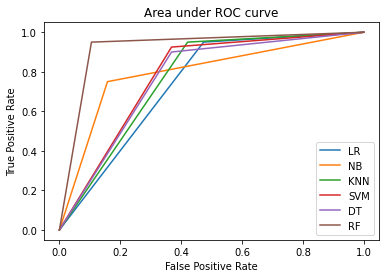

In [124]:
plt.plot(fpr1, tpr1, label='LR')
plt.plot(fpr2, tpr2, label='NB')
plt.plot(fpr3, tpr3, label='KNN')
plt.plot(fpr4, tpr4, label='SVM')
plt.plot(fpr5, tpr5, label='DT')
plt.plot(fpr6, tpr6, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under ROC curve')
plt.legend()
plt.show()

# From the Above Classification report also Random Forest seems to have better scores. 
# The Area under ROC curve is also more for Random Forest (0.92) (Close to 1)
# Thus we conclude by saying Random Forest is the best model in this case